In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

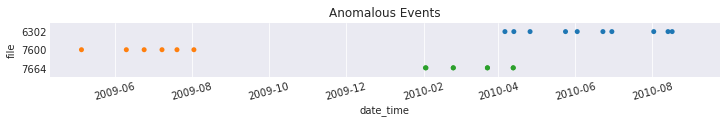

In [2]:
data_dir = os.path.join('.','data')

ref = pd.read_excel(os.path.join(data_dir, 'GroundTruths.xlsx'), 
                    names=['file', 'date_time'])
ref.date_time = pd.to_datetime(ref.date_time)
# sns.rugplot(ref['event DateTime'])
with sns.axes_style(style='darkgrid'):
    plt.figure(figsize=(12,1))
    sns.stripplot(x=ref['date_time'], y=ref['file'],
                 orient='h')# ref
    plt.xticks(rotation=15)
    plt.title('Anomalous Events')

In [8]:
if not os.path.isfile(os.path.join(data_dir, 'completeDB.h5')):
    print('reading in...')
    df = pd.concat([pd.read_csv(os.path.join(data_dir, 'data_6302.csv'), 
                                 index_col=0, parse_dates=True),
                    pd.read_csv(os.path.join(data_dir, 'data_7600.csv'), 
                                 index_col=0, parse_dates=True),
                    pd.read_csv(os.path.join(data_dir, 'data_7664.csv'), 
                                 index_col=0, parse_dates=True)])
    print('creating h5...')
    df.to_hdf(os.path.join(data_dir, 'completeDB.h5'))
    print('done!')
else:
    print('reading h5...')
    df = pd.read_hdf(os.path.join(data_dir, 'completeDB.h5'))
    print('done!')

reading h5...
done!


In [9]:

# df.to_csv(os.path.join(data_dir, 'completeDB.csv'))
df.head()

,DWATT,TNH,CTIM,TXM,T_1,T_2,T_3,T_4,T_5,T_6,...,T_19,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27,target
date_time,,,,,,,,,,,,,,,,,,,,,
2010-04-01 00:01:00,0.0,0.0,61.5508,68.6880,69.3622,69.6943,69.2811,69.1613,68.9111,68.9601,...,67.9353,69.9003,69.6597,68.4944,70.4803,70.2361,69.0025,71.2369,70.7852,0
2010-04-01 00:02:00,0.0,0.0,61.5484,68.6872,69.3614,69.6929,69.2799,69.1613,68.9098,68.9595,...,67.9348,69.9006,69.6606,68.4947,70.4810,70.2352,69.0017,71.2356,70.7840,0
2010-04-01 00:03:00,0.0,0.0,61.5460,68.6864,69.3606,69.6915,69.2787,69.1613,68.9085,68.9589,...,67.9343,69.9010,69.6615,68.4951,70.4818,70.2343,69.0009,71.2343,70.7828,0
2010-04-01 00:04:00,0.0,0.0,61.5437,68.6856,69.3597,69.6900,69.2776,69.1614,68.9073,68.9583,...,67.9337,69.9014,69.6624,68.4955,70.4825,70.2334,69.0001,71.2331,70.7815,0
2010-04-01 00:05:00,0.0,0.0,61.5413,68.6848,69.3589,69.6886,69.2764,69.1614,68.9060,68.9576,...,67.9332,69.9017,69.6633,68.4959,70.4832,70.2325,68.9994,71.2318,70.7803,0


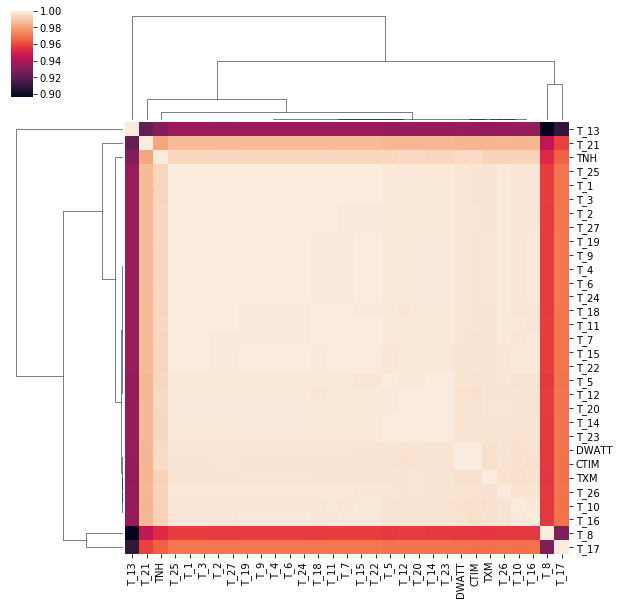

In [5]:
sns.clustermap(df.corr())

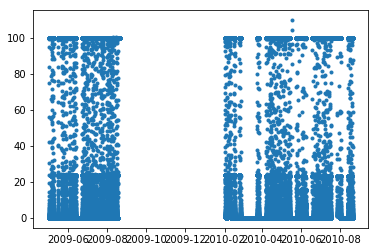

In [6]:
plt.plot(df.TNH[~((df.TNH-df.TNH.mean()).abs()>3*df.TNH.std())], '.')

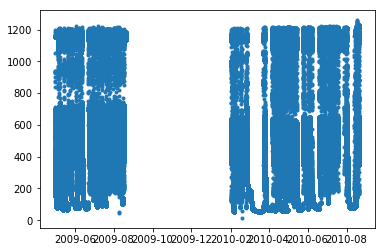

In [7]:
plt.plot(df.T_5[~((df.T_5-df.T_5.mean()).abs()>3*df.T_5.std())], '.')

In [8]:
# sns.pairplot(df1[~((df1-df1.mean()).abs()>3*df1.std())])

In [9]:
X = df.values
from sklearn.decomposition import TruncatedSVD, FastICA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pca = TruncatedSVD()

X_p = MinMaxScaler().fit_transform(pca.fit_transform(X))

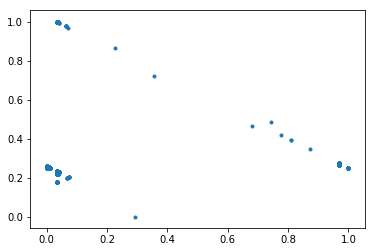

In [10]:
plt.scatter(X_p[:,0], X_p[:,1], marker='.')

In [14]:
from sklearn.cluster import DBSCAN, SpectralClustering, Birch, MeanShift, MiniBatchKMeans

# clust = DBSCAN(eps=.1, leaf_size=10)
clust = Birch(threshold=.005, n_clusters=None)
clust.fit(X_p)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.005)

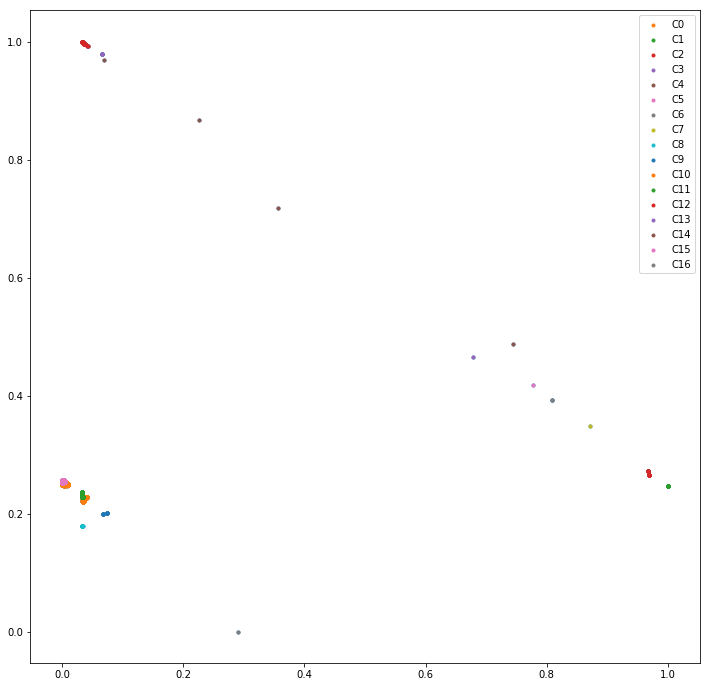

In [21]:
plt.figure(figsize=(12,12))
plt.scatter(X_p[:,0], X_p[:,1], marker='.')

for c in range(17):
    mask = clust.labels_==c
    plt.scatter(X_p[mask,0], X_p[mask,1], marker='.', label=f'C{c}')

plt.legend()

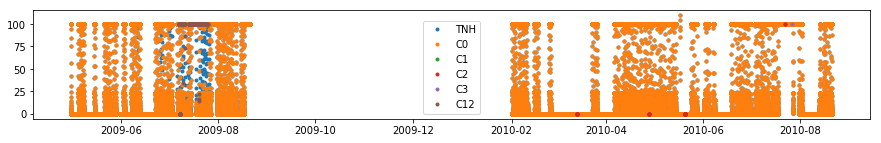

In [38]:
plt.figure(figsize=(15,2))
plt.plot(df.TNH[~((df.TNH-df.TNH.mean()).abs()>3*df.TNH.std())], '.')
plt.plot(df.TNH[~((df.TNH-df.TNH.mean()).abs()>3*df.TNH.std()) & (clust.labels_==0)], '.', label='C0')
plt.plot(df.TNH[~((df.TNH-df.TNH.mean()).abs()>3*df.TNH.std()) & (clust.labels_==1)], '.', label='C1')
plt.plot(df.TNH[~((df.TNH-df.TNH.mean()).abs()>3*df.TNH.std()) & (clust.labels_==2)], '.', label='C2')
plt.plot(df.TNH[~((df.TNH-df.TNH.mean()).abs()>3*df.TNH.std()) & (clust.labels_==3)], '.', label='C3')
plt.plot(df.TNH[~((df.TNH-df.TNH.mean()).abs()>3*df.TNH.std()) & (clust.labels_==12)], '.', label='C12')
plt.legend()

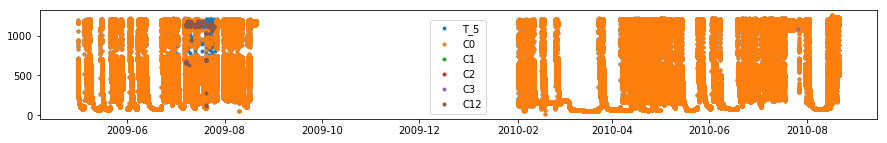

In [39]:
plt.figure(figsize=(15, 2))
plt.plot(df.T_5[~((df.T_5-df.T_5.mean()).abs()>3*df.T_5.std())], '.')
plt.plot(df.T_5[~((df.T_5-df.T_5.mean()).abs()>3*df.T_5.std())& (clust.labels_==0)], '.', label='C0')
plt.plot(df.T_5[~((df.T_5-df.T_5.mean()).abs()>3*df.T_5.std())& (clust.labels_==1)], '.', label='C1')
plt.plot(df.T_5[~((df.T_5-df.T_5.mean()).abs()>3*df.T_5.std())& (clust.labels_==2)], '.', label='C2')
plt.plot(df.T_5[~((df.T_5-df.T_5.mean()).abs()>3*df.T_5.std())& (clust.labels_==3)], '.', label='C3')
plt.plot(df.T_5[~((df.T_5-df.T_5.mean()).abs()>3*df.T_5.std())& (clust.labels_==12)], '.', label='C12')
plt.legend()

In [40]:
df['target'] = 0
df.loc[np.isin(df.index,ref.date_time), 'target'] = 1


In [60]:
n_comp = len(np.unique(clust.labels_))
ica = FastICA(n_components=n_comp)
X_s = ica.fit_transform(X)

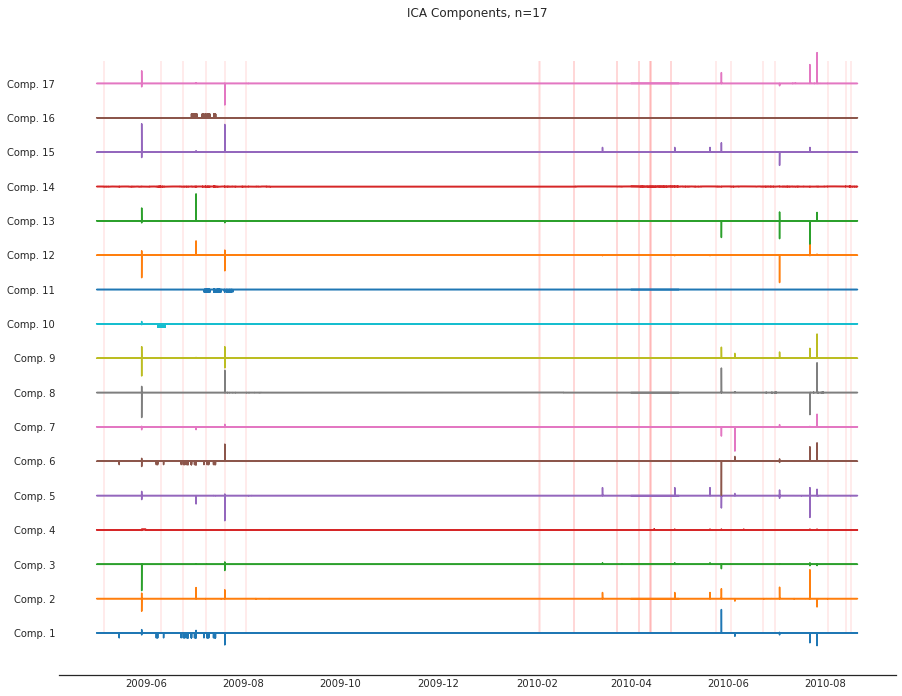

In [61]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,12))
    for n,sig in enumerate(X_s.T):
        plt.plot(df.index, sig+.6*n)
    plt.vlines(df[df.target==1].index, 0,10, alpha=.1, color='r')
    sns.despine(left=True)
    plt.yticks(.6*np.arange(n_comp), [f'Comp. {n+1}' for n in np.arange(n_comp)])
    plt.title(f'ICA Components, n={n_comp}')

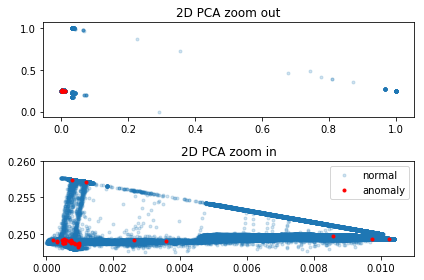

In [62]:

plt.subplot(211)
plt.title('2D PCA zoom out')
plt.scatter(X_p[df.target==0,0], X_p[df.target==0,1], marker='.', alpha=.2)
plt.scatter(X_p[df.target==1,0], X_p[df.target==1,1], marker='.', c='r')


plt.subplot(212)
plt.title('2D PCA zoom in')
plt.scatter(X_p[df.target==0,0], X_p[df.target==0,1], marker='.', alpha=.2, label='normal')
plt.scatter(X_p[df.target==1,0], X_p[df.target==1,1], marker='.', c='r', label='anomaly')
plt.xlim(-.0001, 0.011)
plt.ylim(.247, .26)
plt.legend()

# plt.scatter(X_p[df.target==0,0], X_p[df.target==0,1], marker='.')
plt.tight_layout()

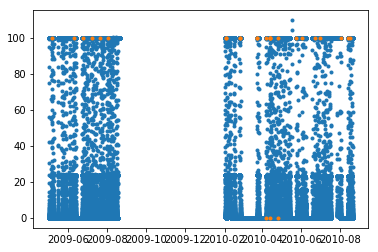

In [63]:
plt.plot(df.TNH[~((df.TNH-df.TNH.mean()).abs()>3*df.TNH.std())], '.')
plt.plot(df.TNH[df.target==1], '.')

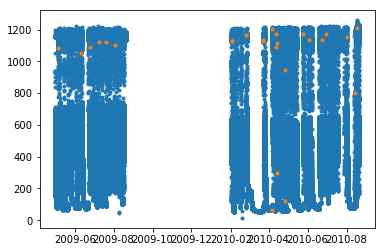

In [64]:
plt.plot(df.T_5[~((df.T_5-df.T_5.mean()).abs()>3*df.T_5.std())], '.')
plt.plot(df.T_5[df.target==1], '.')

In [65]:
# this is where the anomalies are
df[df.target==1]

,DWATT,TNH,CTIM,TXM,T_1,T_2,T_3,T_4,T_5,T_6,...,T_19,T_20,T_21,T_22,T_23,T_24,T_25,T_26,T_27,target
date_time,,,,,,,,,,,,,,,,,,,,,
2010-04-06 07:31:00,95.1555,99.9711,59.7671,1170.0348,1163.8711,1175.6909,1176.3792,1178.5258,1202.1744,1196.5774,...,1192.9768,1190.3556,1184.4979,1181.5865,1174.4514,1175.1837,1170.1671,1164.2290,1161.8461,1
2010-04-12 21:05:00,157.0701,100.0348,48.7546,1093.7539,1109.0712,1090.2693,1091.6812,1076.5453,1089.1886,1098.6168,...,1099.8911,1067.2374,1099.6715,1056.5010,1115.6212,1090.3802,1133.6750,1099.6610,1128.0303,1
2010-04-13 08:57:00,129.4635,100.0002,52.7964,1127.8279,1123.7460,1159.3987,1149.5083,1141.5543,1116.9581,1133.3145,...,1168.4109,1132.4207,1127.5273,1098.8630,1108.0013,1106.2346,1152.6569,1125.7911,1168.2329,1
2010-04-26 05:20:00,23.8656,99.9507,75.1213,913.6279,944.1394,945.7621,951.7084,947.2372,947.9105,940.9503,...,890.4365,914.7272,917.4006,933.0939,933.8350,927.6166,923.3457,927.9372,928.7457,1
2010-05-24 07:37:00,56.2702,99.9752,89.8001,1147.6472,1192.4578,1184.8370,1193.1808,1179.3240,1172.8927,1156.6599,...,1161.3423,1173.3826,1173.1793,1174.3228,1166.3435,1182.9591,1189.6237,1188.0815,1194.1360,1
2010-06-02 14:10:00,130.8187,99.9623,80.6542,1121.0172,1145.0847,1134.2438,1112.6813,1108.3149,1135.5708,1097.1516,...,1111.8019,1136.5642,1101.8743,1119.3557,1110.5737,1136.3397,1113.6185,1140.9794,1125.3053,1
2010-06-22 22:48:00,117.1322,99.9974,71.0240,1138.3114,1147.2961,1161.2864,1144.9658,1140.2866,1136.4355,1141.7573,...,1178.9954,1166.8018,1142.2820,1144.9435,1131.6482,1118.5234,1149.0725,1134.1562,1160.1704,1
2010-06-30 00:54:00,109.1035,99.9838,62.2478,1154.2511,1181.2008,1183.0404,1166.4819,1159.0300,1171.1492,1136.4343,...,1175.6277,1190.2013,1177.9436,1155.3538,1156.5703,1138.3688,1148.1863,1150.2976,1152.3303,1
2010-08-02 05:15:00,48.4559,99.9730,95.2368,1124.8823,1164.8356,1164.0388,1162.5740,1156.5762,1155.6281,1140.5326,...,1126.3977,1142.5299,1140.8418,1144.2646,1133.9426,1144.1793,1148.9811,1154.3540,1163.7754,1


In [66]:
# store = pd.HDFStore(os.path.join(data_dir, 'completeDB.h5'),complevel=9, complib='bzip2')
# store['df'] = df
# store.close()
# df.to_excel(os.path.join(data_dir, 'completeDB.xlsx'))
X, y = df.loc[:,df.columns!='target'].values, df.target.values

In [80]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

clf_svm = make_pipeline(StandardScaler(),
                    SGDClassifier(penalty='elasticnet', class_weight='balanced'))
# clf_svm.fit(X,y)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

params = {'decisiontreeclassifier__max_depth':range(3,10, 2)}
# params = {'adaboostclassifier__base_estimator__max_depth':range(3,7)}
clf_dt = GridSearchCV(make_pipeline(StandardScaler(), 
                      DecisionTreeClassifier(class_weight='balanced')), 
                      params, cv=3)
# clf_dt = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced'))
clf_dt.fit(X,y)


# from sklearn.neural_network import MLPClassifier
# clf_nn = make_pipeline(StandardScaler(), 
#                        MLPClassifier(hidden_layer_sizes=(100, 20, 50), solver='adam'))
# clf_nn.fit(X, y)
                     

/home/tbsexton/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_i...     min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'decisiontreeclassifier__max_depth': range(3, 10, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [81]:
print(classification_report(y, clf_dt.predict(X)))
print(confusion_matrix(y, clf_dt.predict(X)))

pd.DataFrame(clf_dt.cv_results_).T

             precision    recall  f1-score   support

          0       1.00      0.94      0.97    493881
          1       0.00      1.00      0.00        27

avg / total       1.00      0.94      0.97    493908

[[462038  31843]
 [     0     27]]


,0,1,2,3
mean_fit_time,3.33541,4.10537,4.26101,4.30746
mean_score_time,0.0532975,0.0546384,0.0547922,0.054416
mean_test_score,0.759447,0.947174,0.994157,0.997293
mean_train_score,0.809719,0.924925,0.959313,0.985056
param_decisiontreeclassifier__max_depth,3,5,7,9
params,{'decisiontreeclassifier__max_depth': 3},{'decisiontreeclassifier__max_depth': 5},{'decisiontreeclassifier__max_depth': 7},{'decisiontreeclassifier__max_depth': 9}
rank_test_score,4,3,2,1
split0_test_score,0.527922,0.952568,0.997455,0.999921
split0_train_score,0.72506,0.909895,0.946069,0.989295
split1_test_score,0.880858,0.901109,0.994175,0.997267


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

clf_ab = AdaBoostClassifier(DecisionTreeClassifier(class_weight='balanced', max_depth=3))
clf_ab.fit(X,y)

# print(classification_report(y, clf_svm.predict(X)))
# print(confusion_matrix(y, clf_svm.predict(X)))

In [83]:
print(classification_report(y, clf_ab.predict(X)))
print(confusion_matrix(y, clf_ab.predict(X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    493881
          1       1.00      1.00      1.00        27

avg / total       1.00      1.00      1.00    493908

[[493881      0]
 [     0     27]]


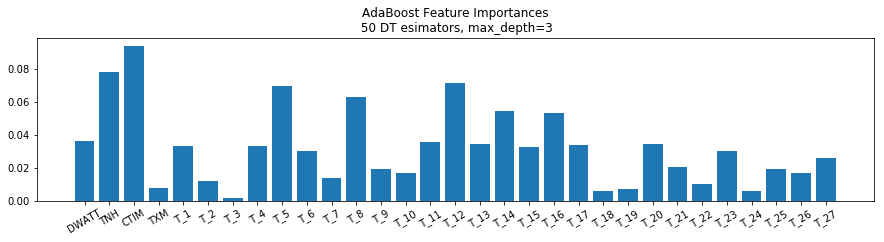

In [104]:
plt.figure(figsize=(15,3))
plt.bar(range(31), clf_ab.feature_importances_, align='center')
plt.xticks(range(31), df.columns, rotation=30);
plt.title('AdaBoost Feature Importances\n 50 DT esimators, max_depth=3')

# Feature Extraction/Engineering

### Local (windowed) filtering visualization

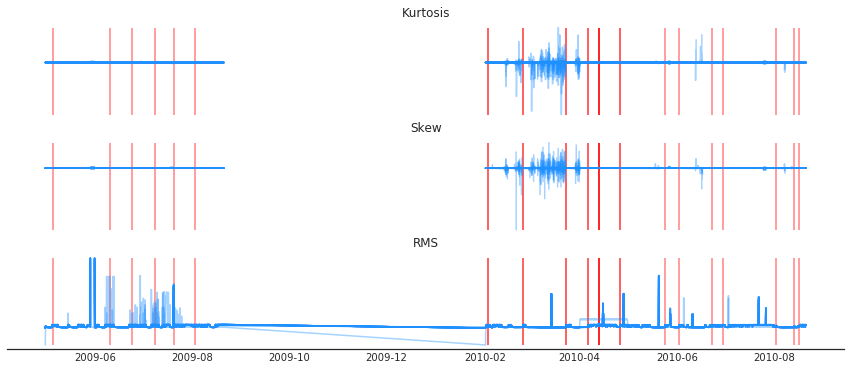

In [116]:
r = ((df-df.mean())/df.std()).sort_index().rolling('6h')  # 6hr rolling window (after scaling)


no_outl = lambda s: s[~((s-s.mean()).abs()>3*s.std())]   # naive global outlier removal
def silly_prep(r, ax=None):
    pl = r.loc[:,'T_1':]  # all the T_x sensors
    pl = no_outl(pl)
    pl = (pl-pl.mean())/pl.std()
    
    plt.figure(figsize=(15, 2))
    if ax is None:
        ax = plt.gca()
    ax.plot(pl, color='dodgerblue', alpha=.4);  # where is the kurtosis "happening"?
    ax.vlines(df[df.target==1].index, pl.min().min(), pl.max().max(), alpha=.5, color='r')
    for label in ax.get_yticklabels():
        label.set_visible(False)

with sns.axes_style('white'):
    f, ax = plt.subplots(nrows=3, sharex=True, figsize=(15,6))
    ## Kurtosis ##
    silly_prep(r.kurt(), ax=ax[0])
#     sns.despine(left=True, bottom=True)
    ax[0].set_title('Kurtosis')
    ax[0].axis('off')
    ## Skew ##
    silly_prep(r.skew(), ax=ax[1])
    ax[1].set_title('Skew')
#     sns.despine(left=True, bottom=True)
    ax[1].axis('off')
    ## RMS ##
    silly_prep(r.apply(lambda x: np.sqrt(np.square(x).sum())), ax=ax[2])
    ax[2].set_title('RMS')
    sns.despine(left=True, ax=ax[2])
    
    

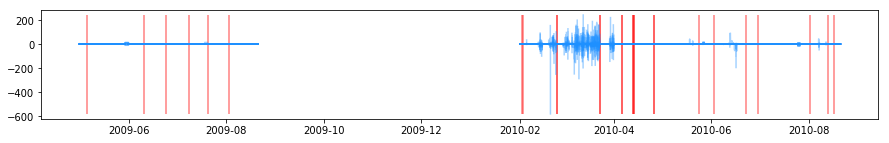

In [66]:
## Skew ##
silly_prep(r.skew())

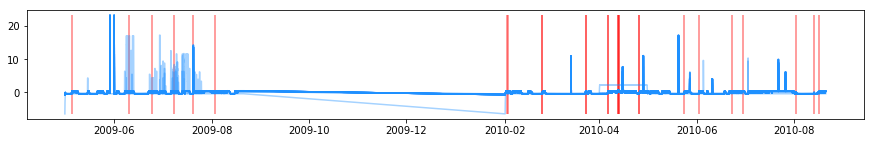

In [67]:
## RMS ##
silly_prep(r.apply(lambda x: np.sqrt((x**2).sum())))

### Globally filtered Projection

In [104]:
from scipy.stats import zscore
df_filt = df[(np.abs(zscore(df))<3).all(axis=1)]
df_out = df[(np.abs(zscore(df))>3).any(axis=1)]
print(abs(df_filt.shape[0]-df.shape[0]), 'outliers (>3 stdev)')

4709 outliers (>3 stdev)


In [91]:
(df_filt.target==1).sum()

0

In [118]:
from sklearn.manifold import SpectralEmbedding

X = df_filt.loc[:,:'T_27'].values

# pca = TruncatedSVD()
# proj_scale = MinMaxScaler()
scale_proj = make_pipeline(TruncatedSVD(), MinMaxScaler())
# pca = KernelPCA(n_components=2, kernel='cosine')  # memory error
# pca = SpectralEmbedding()  # memory error

X_p = scale_proj.fit_transform(X)  # train on outlier-filtered data

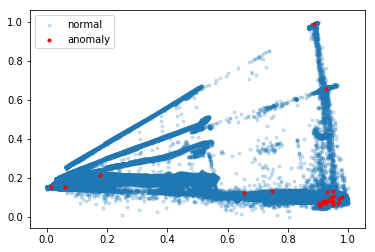

In [120]:
X_tp = scale_proj.transform(df[df.target==1].loc[:,:'T_27'].values)  # true anomalies

plt.scatter(X_p[:,0], X_p[:,1], marker='.', alpha=.2, label='normal')

# plt.scatter(X_out[:,0], X_out[:,1], marker='+', c='orange', label='Outlier')
plt.scatter(X_tp[:,0], X_tp[:,1], marker='.', c='r', label='anomaly')
plt.legend()

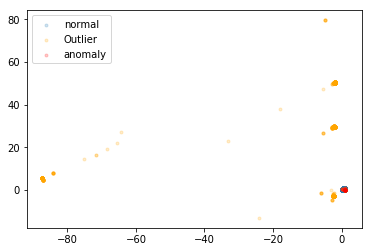

In [123]:
X_out = scale_proj.transform(df_out.loc[:,:'T_27'].values)  # things we filtered out before
plt.scatter(X_p[:,0], X_p[:,1], marker='.', alpha=.2, label='normal')

plt.scatter(X_out[:,0], X_out[:,1], marker='.', c='orange', alpha=.2, label='Outlier')
plt.scatter(X_tp[:,0], X_tp[:,1], marker='.', c='r', alpha=.2, label='anomaly')
plt.legend()

(2, 31)


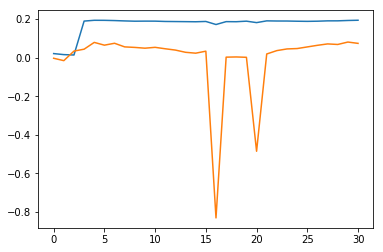

In [141]:
print(scale_proj.named_steps['truncatedsvd'].components_.shape)
plt.plot( scale_proj.named_steps['truncatedsvd'].components_.T)

In [60]:
n_comp = len(np.unique(clust.labels_))
ica = FastICA(n_components=n_comp)
X_s = ica.fit_transform(X)

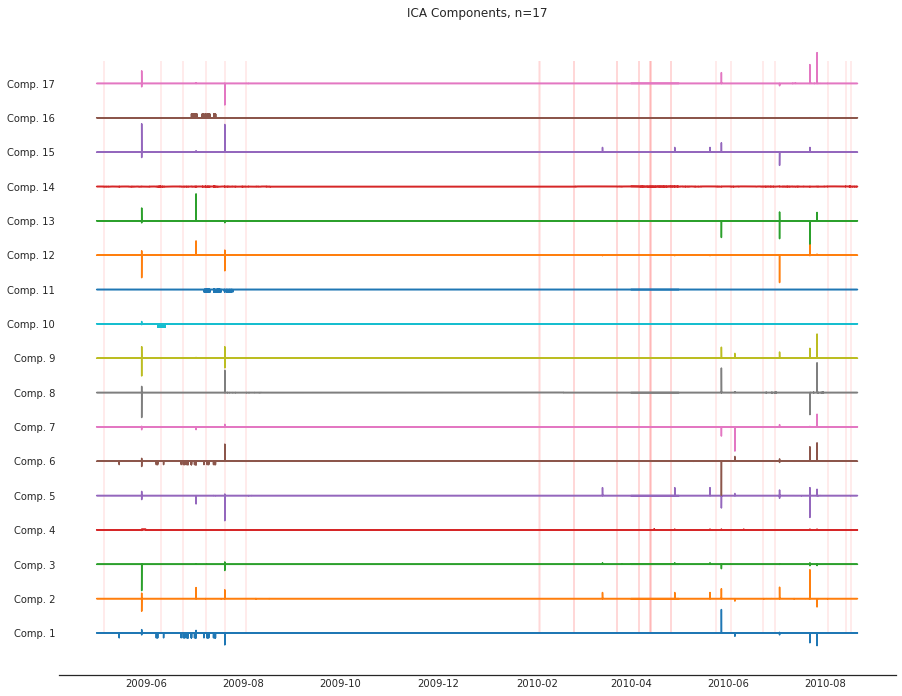

In [61]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,12))
    for n,sig in enumerate(X_s.T):
        plt.plot(df.index, sig+.6*n)
    plt.vlines(df[df.target==1].index, 0,10, alpha=.1, color='r')
    sns.despine(left=True)
    plt.yticks(.6*np.arange(n_comp), [f'Comp. {n+1}' for n in np.arange(n_comp)])
    plt.title(f'ICA Components, n={n_comp}')